In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)


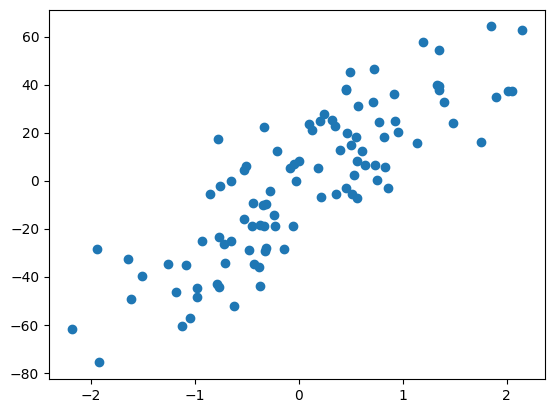

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [5]:
print(X_train.shape)
print(X_test.shape)

(80, 1)
(20, 1)


# Linear regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)

-2.160744361188285
[28.2336575]


# Ridge regression; alpha=10

In [7]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X_train,y_train)
print(rr.intercept_)
print(rr.coef_)

-1.9723373693450363
[24.7013218]


# Ridge regression; alpha=100

In [8]:
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=100)
rr1.fit(X_train,y_train)
print(rr1.intercept_)
print(rr1.coef_)

-1.2745391230020746
[11.61869873]


# Plot for lr,rr,rr1

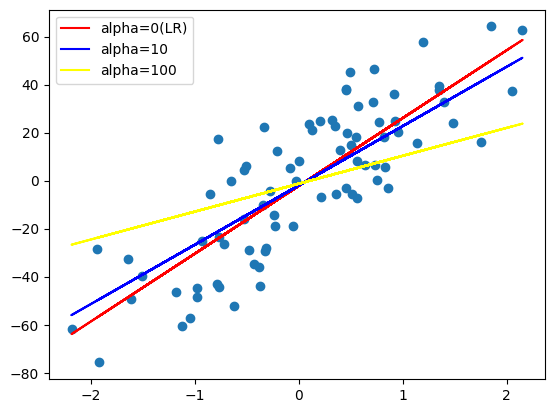

In [9]:
plt.scatter(X_train,y_train)
plt.plot(X_train, lr.predict(X_train), color='red', label='alpha=0(LR)')
plt.plot(X_train, rr.predict(X_train), color='blue', label='alpha=10')
plt.plot(X_train, rr1.predict(X_train), color='yellow', label='alpha=100')
plt.legend()
plt.show()

# Ridge Regression Class

In [10]:
class RidgeReg:
  def __init__(self,alpha=10):
    self.alpha = alpha
    self.m = None
    self.b = None

  def fit(self,X_train,y_train):
    self.m = np.sum((X_train.ravel() - X_train.mean()) * (y_train.ravel() - y_train.mean())) / (np.sum((X_train.ravel() - X_train.mean())**2 )+ self.alpha)
    self.b = y_train.mean() - self.m * X_train.mean()

    # self.m = np.sum((X_train - X_train.mean()) * (y_train - y_train.mean())) / (np.sum((X_train - X_train.mean())**2) + self.alpha)
    # self.b = y_train.mean() - self.m * X_train.mean()

    print(self.b, self.m)
  def predict(self,X_test):
    return self.b + self.m * X_test

In [11]:
rid = RidgeReg()
rid.fit(X_train,y_train)
y_pred = rid.predict(X_test)

-1.9723373693450366 24.701321802538715
